In [1]:
import pandas as pd
import numpy as np
import os 
os.chdir('E:\\')

In [2]:
data = pd.read_csv('bindingdb_feature_combination.csv')

In [3]:
data.describe()

,Label,mol2vec_0,mol2vec_1,mol2vec_2,mol2vec_3,mol2vec_4,mol2vec_5,mol2vec_6,mol2vec_7,mol2vec_8,...,Fingerprint_157,Fingerprint_158,Fingerprint_159,Fingerprint_160,Fingerprint_161,Fingerprint_162,Fingerprint_163,Fingerprint_164,Fingerprint_165,Fingerprint_166
count,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,...,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.000000,136504.0
mean,0.497832,0.108388,-0.036493,0.018396,-0.014654,0.127925,0.064429,0.017166,-0.168142,-0.158260,...,0.906083,0.802138,0.730228,0.938368,0.943848,0.966741,0.952719,0.988015,0.000462,0.0
std,0.499997,0.085308,0.080422,0.070692,0.065398,0.066487,0.072772,0.072559,0.090324,0.074723,...,0.291714,0.398389,0.443843,0.240487,0.230216,0.179313,0.212239,0.108818,0.021478,0.0
min,0.000000,-0.502211,-0.367040,-0.418021,-0.548875,-0.238080,-0.270531,-0.326284,-0.666313,-0.593756,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.049434,-0.090141,-0.025374,-0.058141,0.084308,0.017655,-0.030860,-0.226911,-0.205968,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
50%,0.000000,0.108139,-0.035849,0.017485,-0.014736,0.127743,0.062880,0.014211,-0.165092,-0.161699,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
75%,1.000000,0.164883,0.017406,0.063114,0.026495,0.171644,0.108841,0.061598,-0.106055,-0.111822,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
max,1.000000,0.548626,0.414519,0.407529,0.326021,0.569308,0.469906,0.424237,0.182420,0.357645,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [4]:
import random 
import matplotlib.pyplot as plt 

In [5]:
import seaborn as sns 

In [7]:
from sklearn.utils import shuffle
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [8]:
# SPVec (SMILES2Vec-ProtVec)
data =data.dropna().reset_index(drop = True)
x,y =shuffle(data.iloc[:,203:],data.iloc[:,2],random_state = 10086)
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2, random_state=99)

In [ ]:
clf_GBT =GradientBoostingClassifier(learning_rate=0.1,n_estimators=400,max_depth=10,random_state = 11)
clf_GBT = clf_GBT.fit(x_train,y_train)
#pre_y_list = clf_GBT.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba = clf_GBT.predict_proba(x_test)
fpr_GBT,tpr_GBT, _GBT = roc_curve(y_test, pre_y_proba[:,1],pos_label=1)
auc_GBT = auc(fpr_GBT, tpr_GBT)
accuracy_score_GBT=accuracy_score(y_test,pre_y_list)
precision_score_GBT = precision_score(y_test,pre_y_list)
recall_score_GBT = recall_score(y_test,pre_y_list)
f1_score_GBT  = f1_score(y_test,pre_y_list)

print (auc_GBT,accuracy_score_GBT,precision_score_GBT,recall_score_GBT,f1_score_GBT )

In [10]:
auc_GBT = auc(fpr_GBT, tpr_GBT)

In [11]:
auc_GBT

0.9922834450068757

In [12]:
clf_RF =RandomForestClassifier(n_estimators=400,max_depth=25,random_state = 12)
clf_RF = clf_RF.fit(x_train,y_train)
pre_y_RF = clf_RF.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_RF = clf_RF.predict_proba(x_test)
fpr_RF, tpr_RF, _RF = roc_curve(y_test, pre_y_proba_RF[:,1],pos_label=1)
auc_RF = auc(fpr_RF, tpr_RF)
accuracy_score_RF=accuracy_score(y_test,pre_y_RF)
precision_score_RF = precision_score(y_test,pre_y_RF)
recall_score_RF = recall_score(y_test,pre_y_RF)
f1_score_RF  = f1_score(y_test,pre_y_RF)
print (auc_RF,accuracy_score_RF,precision_score_RF,recall_score_RF,f1_score_RF )

0.9926520819529573 0.9678033771656716 0.9809917355371901 0.9542497990206826 0.9674360019264254


In [13]:
clf_DNN = MLPClassifier(hidden_layer_sizes=(64,128,64),random_state= 13)
clf_DNN = clf_DNN.fit(x_train,y_train)
pre_y_DNN = clf_DNN.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_DNN = clf_DNN.predict_proba(x_test)
fpr_DNN, tpr_DNN, _DNN = roc_curve(y_test, pre_y_proba_DNN[:,1],pos_label=1)
auc_DNN = auc(fpr_DNN, tpr_DNN)
print (auc_DNN )

0.961669072386332


In [15]:
import statsmodels.api as sm 
lowess=sm.nonparametric.lowess

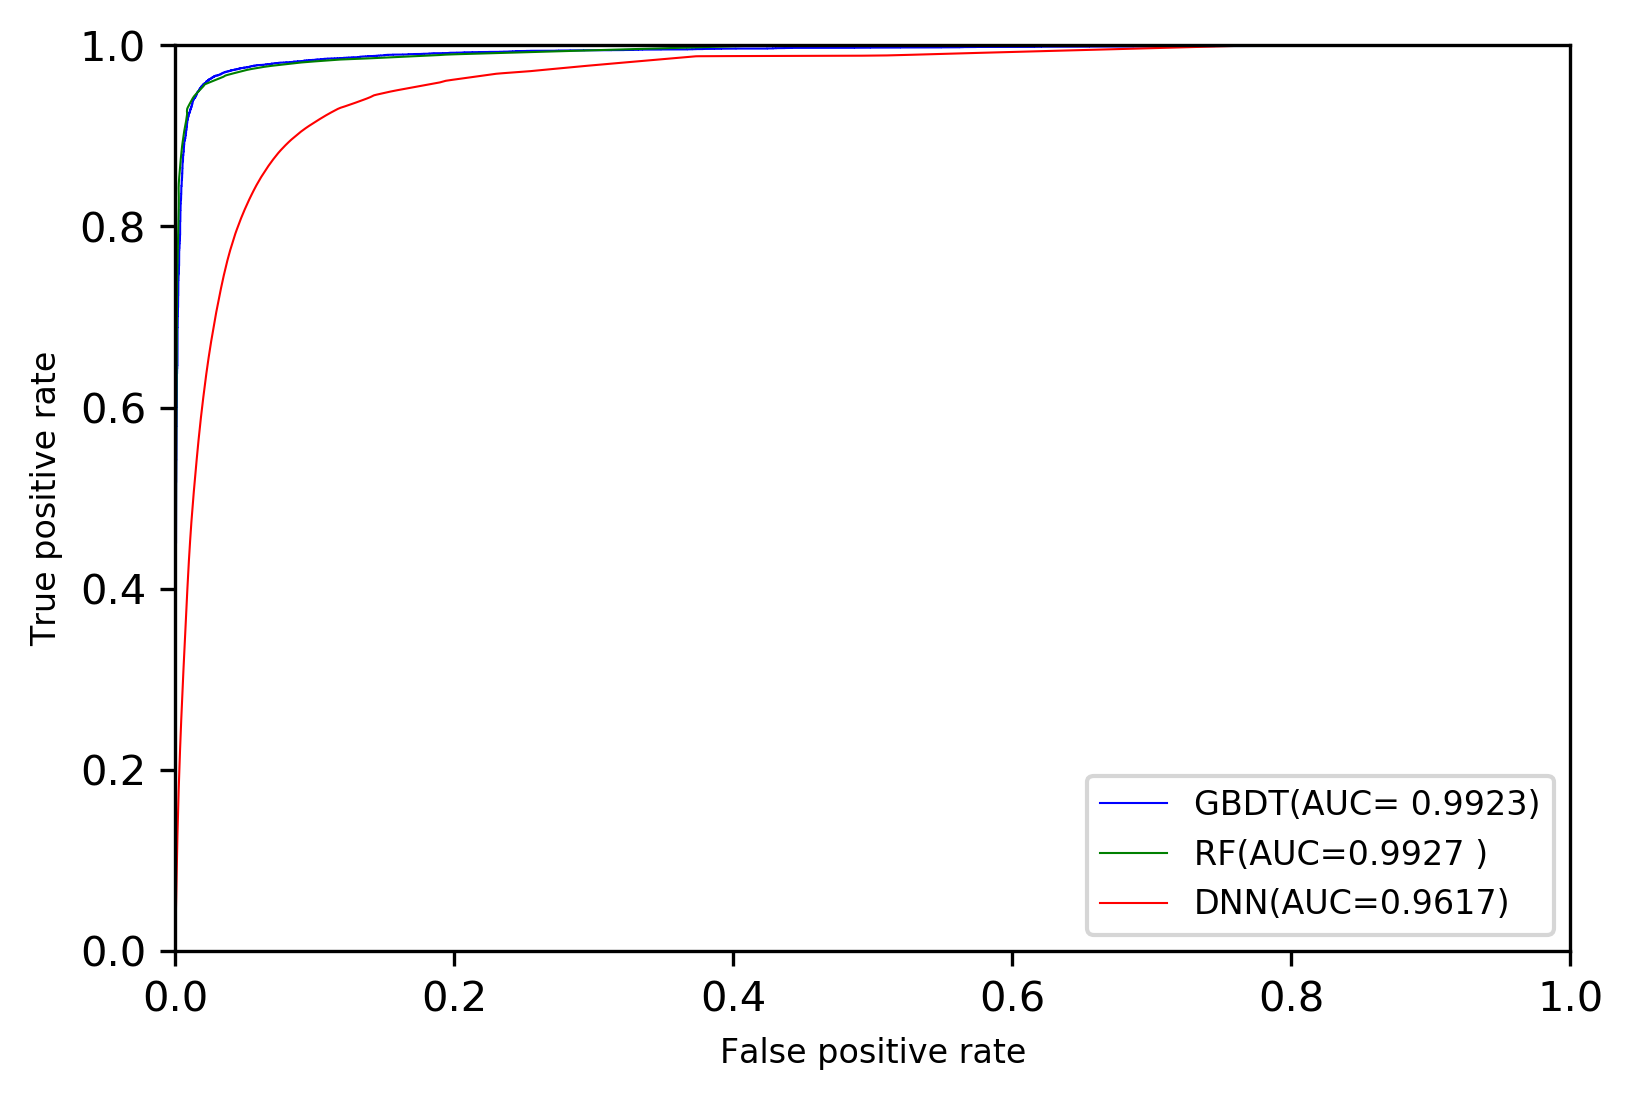

In [16]:
plt.rcParams['savefig.dpi'] = 300    #图片像素
plt.rcParams['figure.dpi'] = 300
plt.figure()  # 画图之前首先设置figure对象，此函数相当于设置一块自定义大小的画布，使得后面的图形输出在这块规定了大小的画布上，其中参数figsize设置画布大小
plt.subplot() # 将figure设置的画布大小分成几个部分，参数‘221’表示2(row)x2(colu),即将画布分成2x2，两行两列的4块区域，1表示选择图形输出的区域在第一块，图形输出区域参数必须在“行x列”范围                       ，此处必须在1和2之间选择——如果参数设置为subplot(111)，则表示画布整个输出，不分割成小块区域，图形直接输出在整块画布上
#GBT=lowess(fpr_GBT, tpr_GBT,frac=0.1)
RF=lowess(fpr_RF, tpr_RF,frac=0.1) 
DNN=lowess(fpr_DNN, tpr_DNN,frac=0.1) 
plt.plot(fpr_GBT, tpr_GBT,label='GBDT(AUC=% .4f)'% auc_GBT,linewidth=0.5,color='b')
plt.plot(RF[:,1], RF[:,0],label='RF(AUC=%.4f )'% auc_RF,linewidth=0.5,color='g') # 在2x2画布中第一块区域输出图形
plt.plot(DNN[:,1],DNN[:,0],label='DNN(AUC=%.4f)'% auc_DNN,linewidth=0.5,color='r')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('False positive rate',fontsize=8)
plt.ylabel('True positive rate',fontsize=8)
plt.legend(loc='lower right',fontsize=8)
plt.savefig('特征组合1.jpg')
plt.show()


In [28]:
#MACCS-ProtVec
c =c.dropna().reset_index(drop = True)
x,y =shuffle(c.iloc[:,3:203],c.iloc[:,2],random_state = 10086)
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2, random_state=99)

In [31]:
clf_GBT =GradientBoostingClassifier(learning_rate=0.1,n_estimators=200,max_depth=7,random_state = 21)
clf_GBT = clf_GBT.fit(x_train,y_train)
pre_y_list = clf_GBT.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba = clf_GBT.predict_proba(x_test)
fpr_GBT, tpr_GBT, _GBT = roc_curve(y_test, pre_y_proba[:,1],pos_label=1)
auc_GBT = auc(fpr_GBT, tpr_GBT)
accuracy_score_GBT=accuracy_score(y_test,pre_y_list)
precision_score_GBT = precision_score(y_test,pre_y_list)
recall_score_GBT = recall_score(y_test,pre_y_list)
f1_score_GBT  = f1_score(y_test,pre_y_list)

print (auc_GBT,accuracy_score_GBT,precision_score_GBT,recall_score_GBT,f1_score_GBT )

0.9478675766788194 0.8809933702062196 0.8908450704225352 0.869034568442593 0.8798046687136991


In [30]:
clf_RF =RandomForestClassifier(n_estimators=300,max_depth=15,random_state = 22)
clf_RF = clf_RF.fit(x_train,y_train)
pre_y_RF = clf_RF.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_RF = clf_RF.predict_proba(x_test)
fpr_RF, tpr_RF, _RF = roc_curve(y_test, pre_y_proba_RF[:,1],pos_label=1)
auc_RF = auc(fpr_RF, tpr_RF)
accuracy_score_RF=accuracy_score(y_test,pre_y_RF)
precision_score_RF = precision_score(y_test,pre_y_RF)
recall_score_RF = recall_score(y_test,pre_y_RF)
f1_score_RF  = f1_score(y_test,pre_y_RF)
print (auc_RF,accuracy_score_RF,precision_score_RF,recall_score_RF,f1_score_RF )

0.930188985226798 0.8542177942199919 0.8711651748144748 0.8322005408170723 0.8512371981759735


In [32]:
clf_DNN = MLPClassifier(hidden_layer_sizes=(64,64,64),random_state= 23 )
clf_DNN = clf_DNN.fit(x_train,y_train)
pre_y_DNN = clf_DNN.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_DNN = clf_DNN.predict_proba(x_test)
fpr_DNN, tpr_DNN, _DNN = roc_curve(y_test, pre_y_proba_DNN[:,1],pos_label=1)
auc_DNN = auc(fpr_DNN, tpr_DNN)
print (auc_DNN )

0.913588167132918


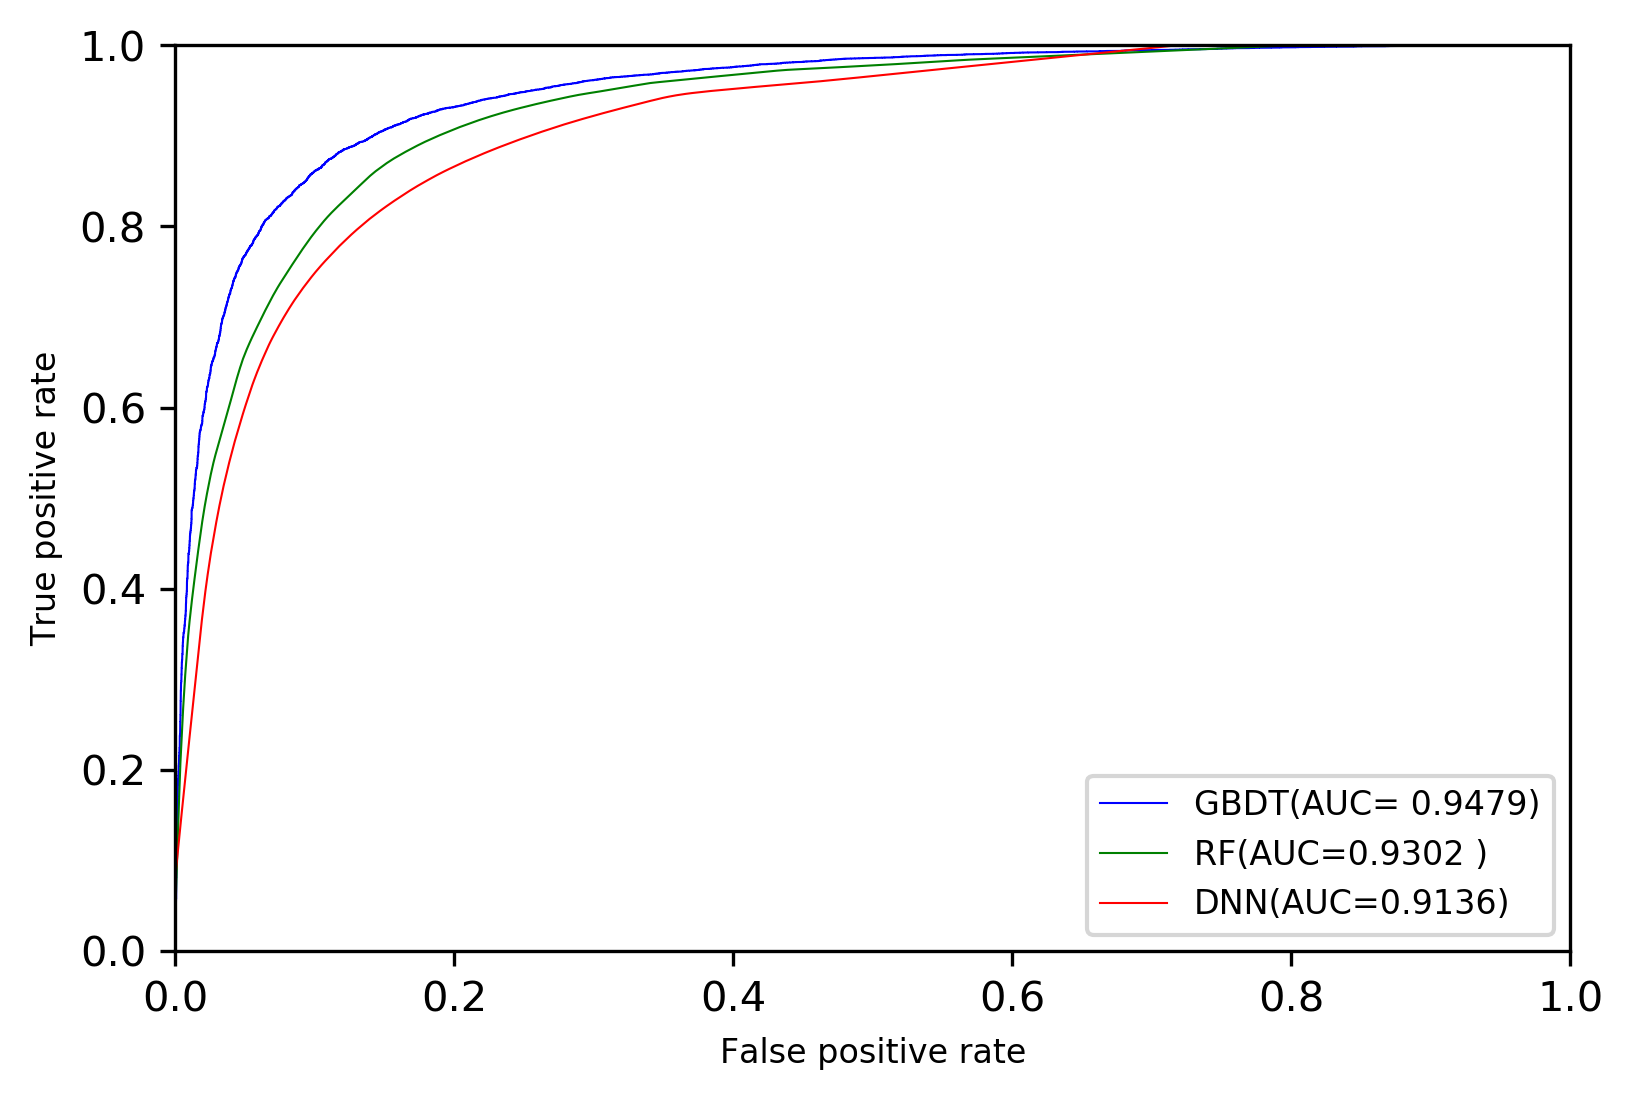

In [33]:

plt.rcParams['savefig.dpi'] = 300    #图片像素
plt.rcParams['figure.dpi'] = 300
plt.figure()  # 画图之前首先设置figure对象，此函数相当于设置一块自定义大小的画布，使得后面的图形输出在这块规定了大小的画布上，其中参数figsize设置画布大小
plt.subplot() # 将figure设置的画布大小分成几个部分，参数‘221’表示2(row)x2(colu),即将画布分成2x2，两行两列的4块区域，1表示选择图形输出的区域在第一块，图形输出区域参数必须在“行x列”范围                       ，此处必须在1和2之间选择——如果参数设置为subplot(111)，则表示画布整个输出，不分割成小块区域，图形直接输出在整块画布上
#GBT=lowess(fpr_GBT, tpr_GBT,frac=0.1)
RF=lowess(fpr_RF, tpr_RF,frac=0.1) 
DNN=lowess(fpr_DNN, tpr_DNN,frac=0.3) 
plt.plot(fpr_GBT, tpr_GBT,label='GBDT(AUC=% .4f)'% auc_GBT,linewidth=0.5,color='b')
plt.plot(RF[:,1], RF[:,0],label='RF(AUC=%.4f )'% auc_RF,linewidth=0.5,color='g') # 在2x2画布中第一块区域输出图形
plt.plot(DNN[:,1],DNN[:,0],label='DNN(AUC=%.4f)'% auc_DNN,linewidth=0.5,color='r')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('False positive rate',fontsize=8)
plt.ylabel('True positive rate',fontsize=8)
plt.legend(loc='lower right',fontsize=8)
plt.savefig('特征组合2.jpg')
plt.show()

In [22]:
d = c.iloc[:,103:203]

e = c.iloc[:,223:389]

f = pd.concat([d,e],axis=1)

In [23]:
#SMILES2Vec-AAC

c =c.dropna().reset_index(drop = True)
x,y =shuffle(f,c.iloc[:,2],random_state = 10086)
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2, random_state=99)

In [24]:
clf_GBT =GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,random_state = 31)
clf_GBT = clf_GBT.fit(x_train,y_train)
pre_y_list = clf_GBT.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba = clf_GBT.predict_proba(x_test)
fpr_GBT, tpr_GBT, _GBT = roc_curve(y_test, pre_y_proba[:,1],pos_label=1)
auc_GBT = auc(fpr_GBT, tpr_GBT)
accuracy_score_GBT=accuracy_score(y_test,pre_y_list)
precision_score_GBT = precision_score(y_test,pre_y_list)
recall_score_GBT = recall_score(y_test,pre_y_list)
f1_score_GBT  = f1_score(y_test,pre_y_list)

print (auc_GBT,accuracy_score_GBT,precision_score_GBT,recall_score_GBT,f1_score_GBT )

0.9036816140495789 0.8271858173693272 0.8562912328113822 0.7873273404955053 0.820362473347548


In [25]:
clf_RF =RandomForestClassifier(n_estimators=100,max_depth=9,random_state = 32)
clf_RF = clf_RF.fit(x_train,y_train)
pre_y_RF = clf_RF.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_RF = clf_RF.predict_proba(x_test)
fpr_RF, tpr_RF, _RF = roc_curve(y_test, pre_y_proba_RF[:,1],pos_label=1)
auc_RF = auc(fpr_RF, tpr_RF)
accuracy_score_RF=accuracy_score(y_test,pre_y_RF)
precision_score_RF = precision_score(y_test,pre_y_RF)
recall_score_RF = recall_score(y_test,pre_y_RF)
f1_score_RF  = f1_score(y_test,pre_y_RF)
print (auc_RF,accuracy_score_RF,precision_score_RF,recall_score_RF,f1_score_RF )

0.8769979153792682 0.7973700597047727 0.8657453109575518 0.7050354454432507 0.7771690969145251


In [26]:
clf_DNN = MLPClassifier(hidden_layer_sizes=(32,32,32),random_state= 33 )
clf_DNN = clf_DNN.fit(x_train,y_train)
pre_y_DNN = clf_DNN.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_DNN = clf_DNN.predict_proba(x_test)
fpr_DNN, tpr_DNN, _DNN = roc_curve(y_test, pre_y_proba_DNN[:,1],pos_label=1)
auc_DNN = auc(fpr_DNN, tpr_DNN)
print (auc_DNN )

0.8708293323425161


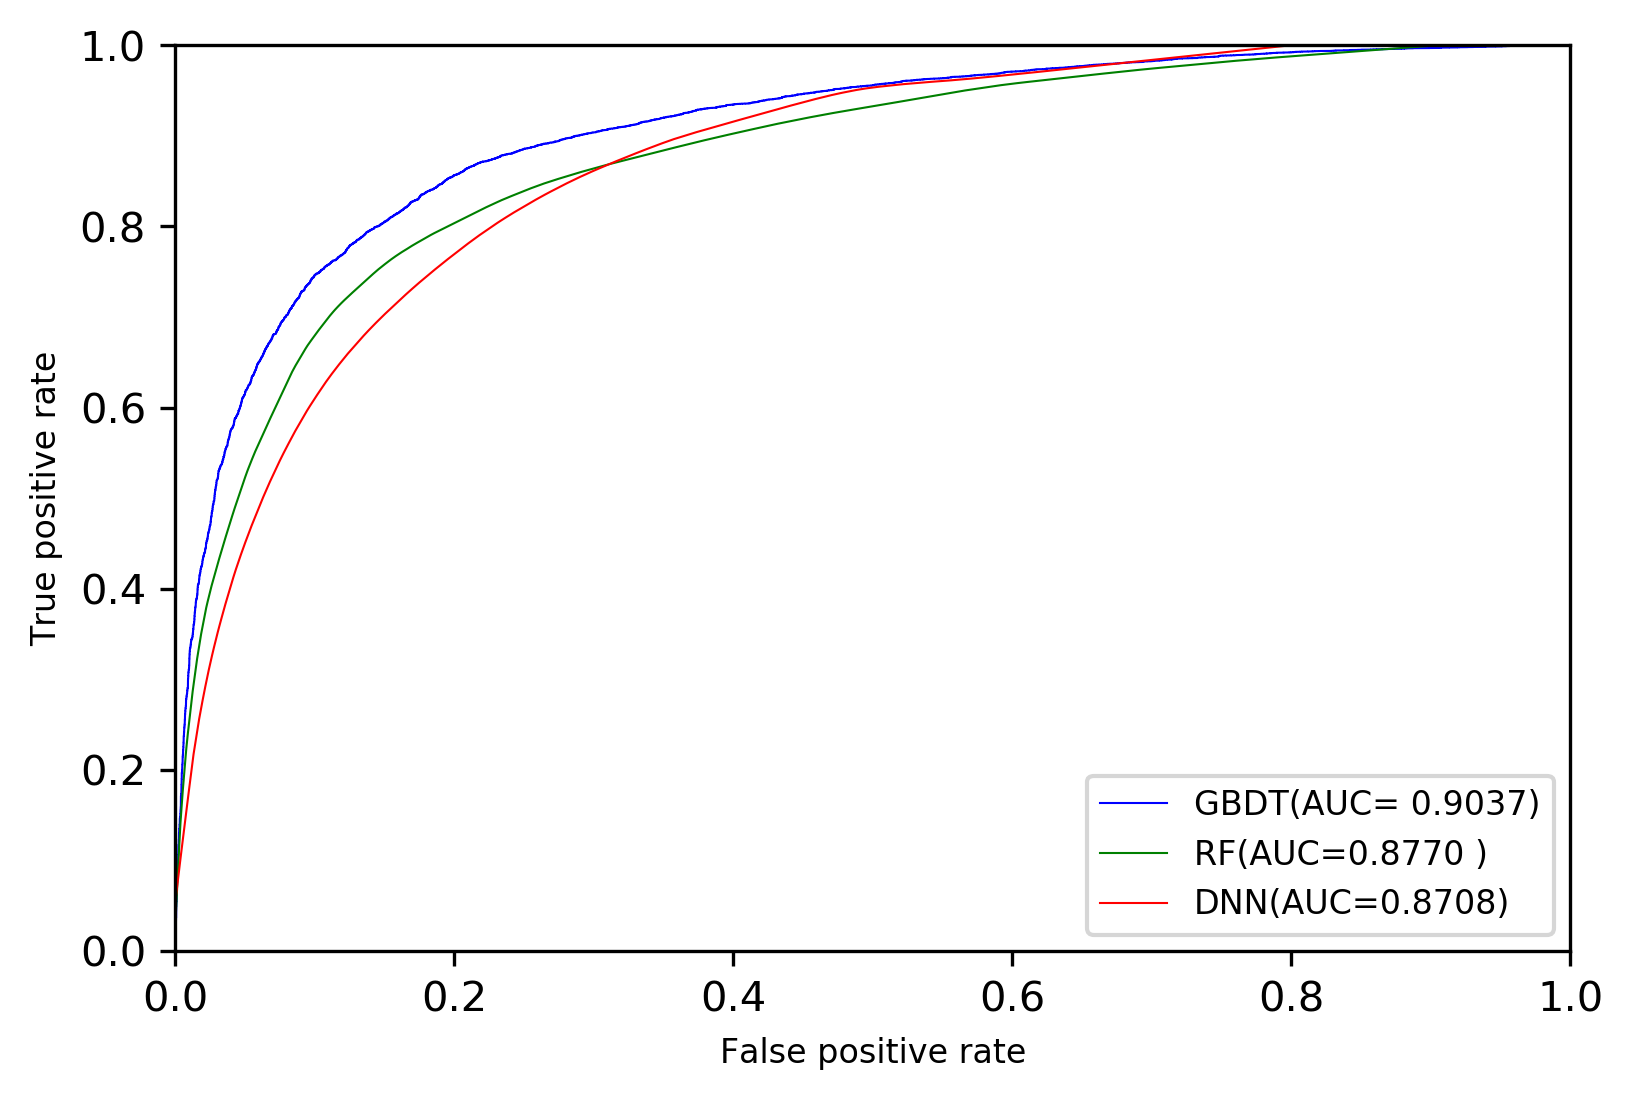

In [27]:
plt.rcParams['savefig.dpi'] = 300    #图片像素
plt.rcParams['figure.dpi'] = 300
plt.figure()  # 画图之前首先设置figure对象，此函数相当于设置一块自定义大小的画布，使得后面的图形输出在这块规定了大小的画布上，其中参数figsize设置画布大小
plt.subplot() # 将figure设置的画布大小分成几个部分，参数‘221’表示2(row)x2(colu),即将画布分成2x2，两行两列的4块区域，1表示选择图形输出的区域在第一块，图形输出区域参数必须在“行x列”范围                       ，此处必须在1和2之间选择——如果参数设置为subplot(111)，则表示画布整个输出，不分割成小块区域，图形直接输出在整块画布上
#GBT=lowess(fpr_GBT, tpr_GBT,frac=0.1)
RF=lowess(fpr_RF, tpr_RF,frac=0.1) 
DNN=lowess(fpr_DNN, tpr_DNN,frac=0.2) 
plt.plot(fpr_GBT, tpr_GBT,label='GBDT(AUC=% .4f)'% auc_GBT,linewidth=0.5,color='b')
plt.plot(RF[:,1], RF[:,0],label='RF(AUC=%.4f )'% auc_RF,linewidth=0.5,color='g') # 在2x2画布中第一块区域输出图形
plt.plot(DNN[:,1],DNN[:,0],label='DNN(AUC=%.4f)'% auc_DNN,linewidth=0.5,color='r')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('False positive rate',fontsize=8)
plt.ylabel('True positive rate',fontsize=8)
plt.legend(loc='lower right',fontsize=8)
plt.savefig('特征组合3.jpg')
plt.show()

In [30]:
#MACCS-AAC
g = c.iloc[:,3:103]

h = c.iloc[:,203:223]

i = pd.concat([g,h],axis=1)

In [31]:
x,y =shuffle(i,c.iloc[:,2],random_state = 10086)
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.2, random_state=99)

In [32]:
clf_GBT =GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,random_state =41)
clf_GBT = clf_GBT.fit(x_train,y_train)
pre_y_list = clf_GBT.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba = clf_GBT.predict_proba(x_test)
fpr_GBT, tpr_GBT, _GBT = roc_curve(y_test, pre_y_proba[:,1],pos_label=1)
auc_GBT = auc(fpr_GBT, tpr_GBT)
accuracy_score_GBT=accuracy_score(y_test,pre_y_list)
precision_score_GBT = precision_score(y_test,pre_y_list)
recall_score_GBT = recall_score(y_test,pre_y_list)
f1_score_GBT  = f1_score(y_test,pre_y_list)

print (auc_GBT,accuracy_score_GBT,precision_score_GBT,recall_score_GBT,f1_score_GBT )

0.8588116525167289 0.7811069191604703 0.8077629582301733 0.7391653877073742 0.7719432147763701


In [34]:
clf_RF =RandomForestClassifier(n_estimators=100,max_depth=7,random_state = 42)
clf_RF = clf_RF.fit(x_train,y_train)
pre_y_RF = clf_RF.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_RF = clf_RF.predict_proba(x_test)
fpr_RF, tpr_RF, _RF = roc_curve(y_test, pre_y_proba_RF[:,1],pos_label=1)
auc_RF = auc(fpr_RF, tpr_RF)
accuracy_score_RF=accuracy_score(y_test,pre_y_RF)
precision_score_RF = precision_score(y_test,pre_y_RF)
recall_score_RF = recall_score(y_test,pre_y_RF)
f1_score_RF  = f1_score(y_test,pre_y_RF)
print (auc_RF,accuracy_score_RF,precision_score_RF,recall_score_RF,f1_score_RF )

0.8359659721426389 0.7468224607157247 0.8365642708022666 0.6149967112475334 0.7088703563305535


In [38]:
clf_DNN = MLPClassifier(hidden_layer_sizes=(16,8,16),random_state= 43 )
clf_DNN = clf_DNN.fit(x_train,y_train)
pre_y_DNN = clf_DNN.predict(x_test)  #将训练中得到的预测y存入到列表
pre_y_proba_DNN = clf_DNN.predict_proba(x_test)
fpr_DNN, tpr_DNN, _DNN = roc_curve(y_test, pre_y_proba_DNN[:,1],pos_label=1)
auc_DNN = auc(fpr_DNN, tpr_DNN)
print (auc_DNN )

0.8451377280545983


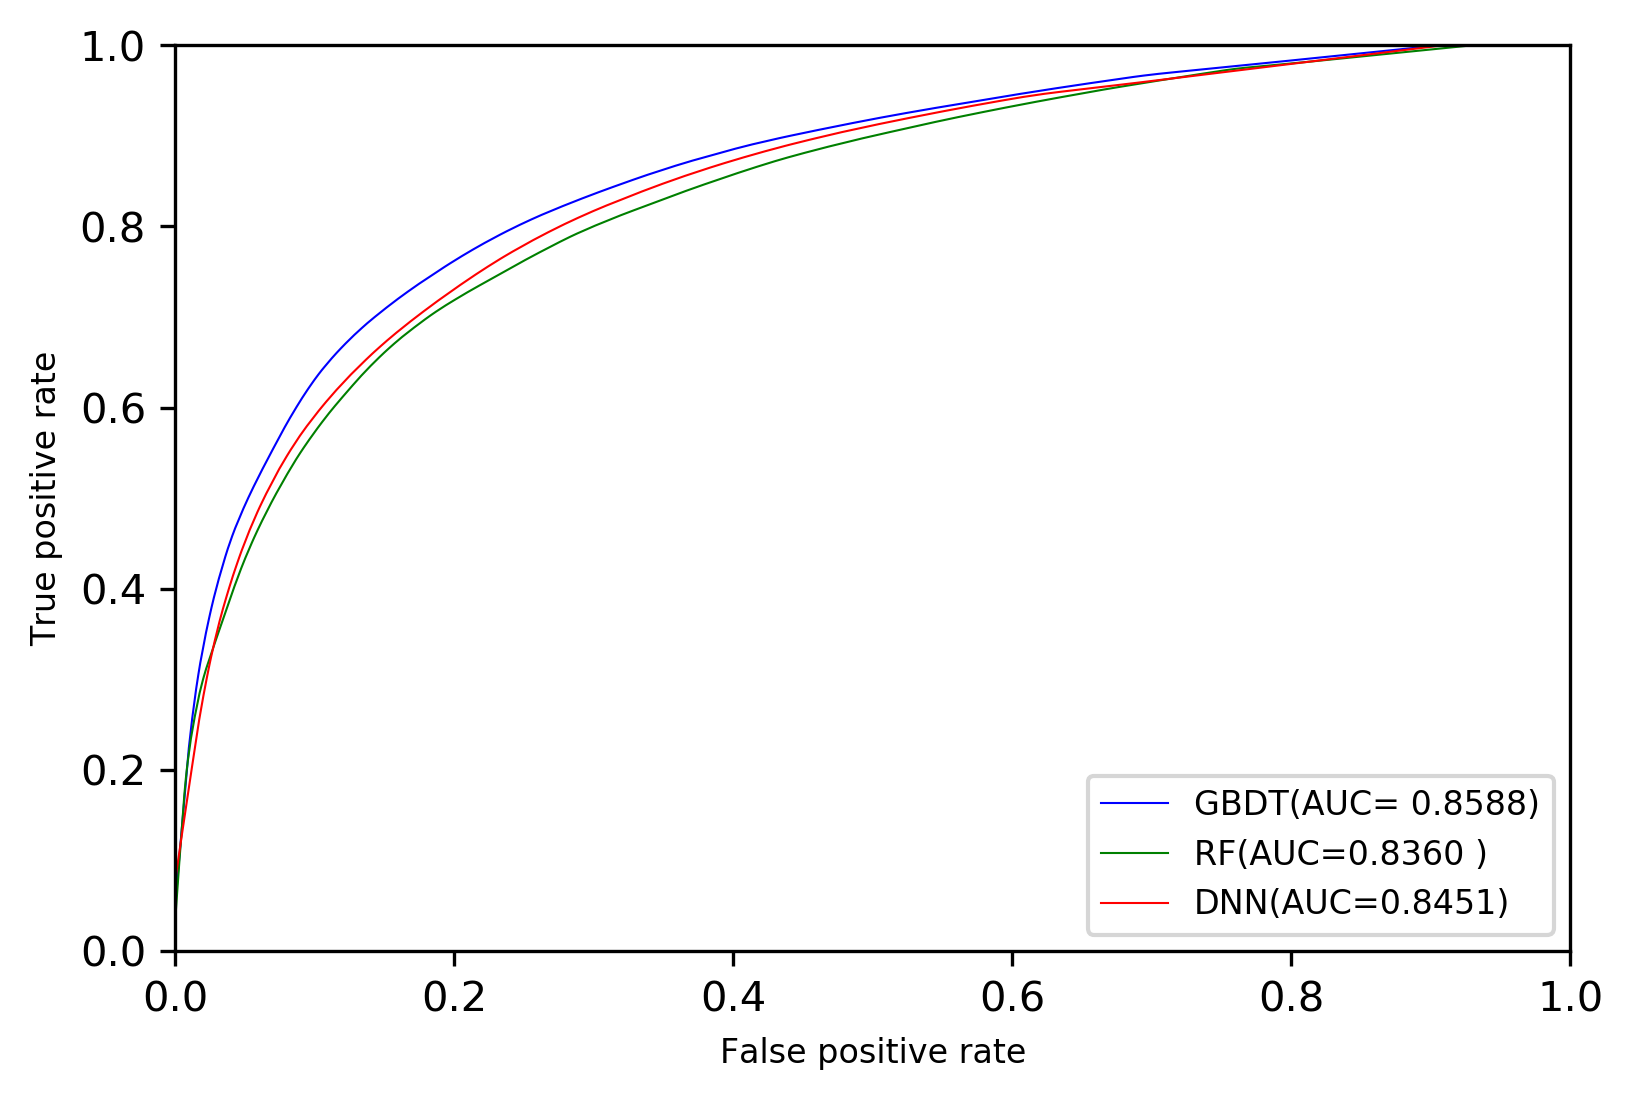

In [39]:
plt.rcParams['savefig.dpi'] = 300    #图片像素
plt.rcParams['figure.dpi'] = 300
plt.figure()  # 画图之前首先设置figure对象，此函数相当于设置一块自定义大小的画布，使得后面的图形输出在这块规定了大小的画布上，其中参数figsize设置画布大小
plt.subplot() # 将figure设置的画布大小分成几个部分，参数‘221’表示2(row)x2(colu),即将画布分成2x2，两行两列的4块区域，1表示选择图形输出的区域在第一块，图形输出区域参数必须在“行x列”范围                       ，此处必须在1和2之间选择——如果参数设置为subplot(111)，则表示画布整个输出，不分割成小块区域，图形直接输出在整块画布上
GBT=lowess(fpr_GBT, tpr_GBT,frac=0.14)
RF=lowess(fpr_RF, tpr_RF,frac=0.1) 
DNN=lowess(fpr_DNN, tpr_DNN,frac=0.2) 
plt.plot(GBT[:,1], GBT[:,0],label='GBDT(AUC=% .4f)'% auc_GBT,linewidth=0.5,color='b')
plt.plot(RF[:,1], RF[:,0],label='RF(AUC=%.4f )'% auc_RF,linewidth=0.5,color='g') # 在2x2画布中第一块区域输出图形
plt.plot(DNN[:,1],DNN[:,0],label='DNN(AUC=%.4f)'% auc_DNN,linewidth=0.5,color='r')

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('False positive rate',fontsize=8)
plt.ylabel('True positive rate',fontsize=8)
plt.legend(loc='lower right',fontsize=8)
plt.savefig('特征组合4.jpg')
plt.show()